#Mixture: 30% C0$_2$ 1% SF$_6$

##Python modules and instalation

In [ ]:
!pip install hep_ml
!pip install mplhep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 31.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668108 sha256=de4e750e0308f70f3acb292f2fe457c4b8981cef2c10e282bda6566348f0b378
  Stored in directory: /root/.cache/pip/wheels/d9/e6/7d/2267d21a99e4ab8276f976f293b4ff23f50c9d809f4a216ebb
Successfully built theano
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 44.8 MB/s eta 0:00:00


In [ ]:
import mplhep
import hep_ml

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls drive/MyDrive/colab2021/scripts

 bins/                         ks_test.py
 completeV3.py                 mass_models.py
'Copia de customPDFs.py'      ' plot_tools ant.py'
'Copia de ks_test.py'          plot_tools.py
'Copia de plot_tools (1).py'   plot_tools_xgb.py
'Copia de plot_tools.py'       __pycache__/
'Copia de SLSQP_zfit.py'       Sergrew_old.py
'Copia de tools.py'            Sergrew.py
 customPDFs.py                 SLSQP_zfit.py
 cuts/                         tools.py
 cuts.py                       weightedcorrelation_matrix.py
 join_split.py                 zfitEffy.py


In [ ]:
import os
import sys
sys.path.append("drive/MyDrive/colab2021/scripts")

In [ ]:
ls drive/MyDrive/colab2021/scripts

 bins/                         ks_test.py
 completeV3.py                 mass_models.py
'Copia de customPDFs.py'      ' plot_tools ant.py'
'Copia de ks_test.py'          plot_tools.py
'Copia de plot_tools (1).py'   plot_tools_xgb.py
'Copia de plot_tools.py'       __pycache__/
'Copia de SLSQP_zfit.py'       Sergrew_old.py
'Copia de tools.py'            Sergrew.py
 customPDFs.py                 SLSQP_zfit.py
 cuts/                         tools.py
 cuts.py                       weightedcorrelation_matrix.py
 join_split.py                 zfitEffy.py


In [ ]:
import plot_tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit
import json
import math

##Global Waming Potential

GWP for different gas mixtures

In [ ]:
def calc_mass(gas, flux, paramC02 = False):

  """
  gas: np.array
    A list with entries [mass, GWP, fraction]
  """

  if paramC02 == False:
    gmass = flux*gas[2]*8760*gas[0]*gas[1]/22.4
  else:
    gmass = flux*8760*44/22.4

  return gmass

In [ ]:
def totalGWP(gases, flux):
  """
  Function that calculates the Global Warming Potential for a gas mixture.

  -----------------------
  Parameters:

  gases: np.array
    An array of arrays containing all list of gases to be used. On the first entry of each subarray
    it should contain the mass of the gass, while on the second one the GWP of the gas must be specified.

  -----------------------
  Returns:

    Nothing for now haha
  """

  GWP = 0
  MCO2 = calc_mass(gases[0], flux, True)

  for i in range(len(gases)):

    GWP = GWP + calc_mass(gases[i], flux)

  GWP = GWP/MCO2

  return GWP

We are gonna calculate all of them in order. The list is:

94.7% R-134a + 5.0% iC4H10 + 0.3% SF6

64.7% R-134a + 30% CO2 + 5.0% iC4H10 + 0.3% SF6

54.7% R-134a + 40% CO2 + 5.0% iC4H10 + 0.3% SF6

64.5% R-134a + 30% CO2 + 5.0% iC4H10 + 0.5% SF6

And also with the consideration of 80% of gas recovery and a flux of 1000 ln/h.


In [ ]:
mix1 = np.array([[102, 1430, 0.947], [58.12, 3, 0.05], [146.06, 22800, 0.03]])
mix2 = np.array([[102, 1430, 0.647], [44, 1, 0.3], [58.12, 3, 0.05], [146.06, 22800, 0.03]])
mix3 = np.array([[102, 1430, 0.547], [44, 1, 0.4], [58.12, 3, 0.05], [146.06, 22800, 0.03]])
mix4 = np.array([[102, 1430, 0.645], [44, 1, 0.3], [58.12, 3, 0.05], [146.06, 22800, 0.05]])

print('The total GWP of mixture 1 is: ', totalGWP(mix1, 1000))
print('The total GWP of mixture 2 is: ', totalGWP(mix2, 1000))
print('The total GWP of mixture 3 is: ', totalGWP(mix3, 1000))
print('The total GWP of mixture 4 is: ', totalGWP(mix4, 1000))

The total GWP of mixture 1 is:  5410.072227272727
The total GWP of mixture 2 is:  4415.872227272727
The total GWP of mixture 3 is:  4084.4722272727277
The total GWP of mixture 4 is:  5922.954954545455


Now, for the 80% recuperation for Freon, the GWP of the volume released to the atmosphere is:

In [ ]:
mix1 = np.array([[102, 1430, 0.947*0.2], [58.12, 3, 0.05], [146.06, 22800, 0.03]])
mix2 = np.array([[102, 1430, 0.647*0.2], [44, 1, 0.3], [58.12, 3, 0.05], [146.06, 22800, 0.03]])
mix3 = np.array([[102, 1430, 0.547*0.2], [44, 1, 0.4], [58.12, 3, 0.05], [146.06, 22800, 0.03]])
mix4 = np.array([[102, 1430, 0.645*0.2], [44, 1, 0.3], [58.12, 3, 0.05], [146.06, 22800, 0.05]])

print('The total GWP of mixture 1 is: ', totalGWP(mix1, 1000))
print('The total GWP of mixture 2 is: ', totalGWP(mix2, 1000))
print('The total GWP of mixture 3 is: ', totalGWP(mix3, 1000))
print('The total GWP of mixture 4 is: ', totalGWP(mix4, 1000))

The total GWP of mixture 1 is:  2898.628227272727
The total GWP of mixture 2 is:  2700.0282272727272
The total GWP of mixture 3 is:  2633.828227272727
The total GWP of mixture 4 is:  4212.414954545455


Now for the presentation

In [ ]:
mix1 = np.array([[102, 1430, 0.952], [58.12, 3, 0.045], [146.06, 22800, 0.003]])
mix2 = np.array([[102, 1430, 0.64], [44, 1, 0.3], [58.12, 3, 0.05], [146.06, 22800, 0.01]])
mix3 = np.array([[102, 1430, 0.54], [44, 1, 0.4], [58.12, 3, 0.05], [146.06, 22800, 0.01]])
mix4 = np.array([[102, 1430, 0.645], [44, 1, 0.3], [58.12, 3, 0.05], [146.06, 22800, 0.005]])

print('The total GWP of mixture 1 is: ', totalGWP(mix1, 1000))
print('The total GWP of mixture 2 is: ', totalGWP(mix2, 1000))
print('The total GWP of mixture 3 is: ', totalGWP(mix3, 1000))
print('The total GWP of mixture 4 is: ', totalGWP(mix4, 1000))

The total GWP of mixture 1 is:  3383.115231818182
The total GWP of mixture 2 is:  2878.9545
The total GWP of mixture 3 is:  2547.5545
The total GWP of mixture 4 is:  2517.1013181818184


In [ ]:
102*1430*0.952 + 58.12*3*0.045 + 146.06*22800*0.03

238771.60619999998

##Analysis plots

We are now going to reproduce the plots for each April scan with different ABS
filters: OFF, 3.3, 4.6, 10 and 22 with 30% CO2.

The list of files is:

5627 for source OFF

5622 for ABS 3.3

5623 for ABS 4.6

5624 for ABS 10


In [ ]:
HV_points = 17

In [ ]:
def read_file(flabel):

  f = open(str(flabel)+'.json')
  data = json.load(f)

  voltages = []
  for i in range(HV_points):
    name = 'HV' + str(i+1)
    voltages.append(data[name]['hveff_KODELE-TOP'])

  efficiency = []
  for j in range(HV_points):
    name = 'HV' + str(j+1)
    efficiency.append(data[name]['efficiencyMuon_corrected'])

  efficiency_err = []
  for i in range(HV_points):
    name = 'HV' + str(i+1)
    efficiency_err.append(data[name]['efficiencyMuon_corrected_err'])

  return voltages, efficiency, efficiency_err

In [ ]:
labels = [5627, 5622, 5623, 5624]

v = []
e = []
err = []

for i in range(len(labels)):
  vi, ei, eei = read_file(labels[i])
  v.append(vi)
  e.append(ei)
  err.append(eei)

In [ ]:
def final_plots(voltages, efficiency, efficiency_err, Scurve):
  x = np.linspace(5900, 7400, 1000)
  fun = Scurve(x, params[0], params[1], params[2])
  plt.plot(x, fun, color = 'green')
  plt.title('GIF++', loc = 'left', fontsize = 22)
  plt.title('Muon efficiency for S5713', loc = 'right', fontsize = 22)
  plt.xlabel('$HV_{eff}$ (V)', fontsize = 20)
  plt.errorbar(x = voltages, y = efficiency, yerr=efficiency_err, xerr=None, fmt = 'bo')
  plt.ylabel('Efficiency (%)', fontsize = 20)
  #plt.text(0.95, 0.07, WP, fontsize = 15)
  plt.show()

In [ ]:
def Scurve(x, Emax, HV50, lam):
    return Emax/(1 + np.exp(-(lam)*(x - HV50)))

In [ ]:
def Scurve_fitting(voltages, efficiency, efficiency_err, flabel):

  def Scurve(x, Emax, HV50, lam):
    return Emax/(1 + np.exp(-(lam)*(x - HV50)))

  def pre_plots(voltages, efficiency, efficiency_err, params, Scurve, flabel):
    x = np.linspace(5900, 7700, 1000)
    fun = Scurve(x, params[0], params[1], params[2])
    plt.plot(x, fun, color = 'green')
    plt.title('GIF++', loc = 'left', fontsize = 22)
    plt.title('Muon efficiency for S'+str(flabel), loc = 'right', fontsize = 22)
    plt.xlabel('$HV_{eff}$ (V)', fontsize = 20)
    plt.errorbar(x = voltages, y = efficiency, yerr=efficiency_err, xerr=None, fmt = 'bo')

    plt.ylabel('Efficiency (%)', fontsize = 20)
    #plt.text(0.95, 0.07, WP, fontsize = 15)
    plt.show()

  p0 = np.array([95.2, 6497.2, 0.010])

  params, cov = curve_fit(Scurve, voltages, efficiency, p0)

  Emax = params[0]
  HV50 = params[1]
  lamb = params[2]

  WP = np.log(19)/lamb + HV50 + 150
  Eff_WP = Scurve(WP, Emax, HV50, lamb)

  print('The working point (WP) is: ', WP, " and the efficiency at the WP is: ", Eff_WP)

  pre_plots(voltages, efficiency, efficiency_err, params, Scurve, flabel)

  results = [params, WP, Eff_WP]

  return results

The working point (WP) is:  7082.3411689485765  and the efficiency at the WP is:  97.62145147511471


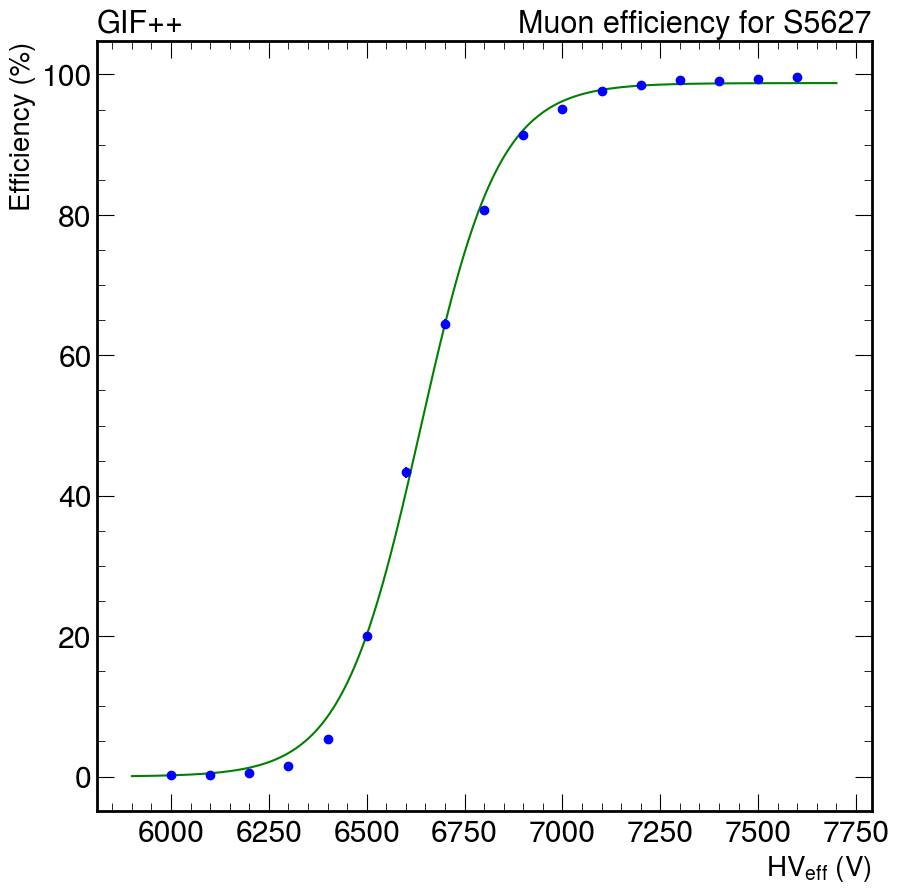

The working point (WP) is:  7126.621431989517  and the efficiency at the WP is:  93.47470058938408


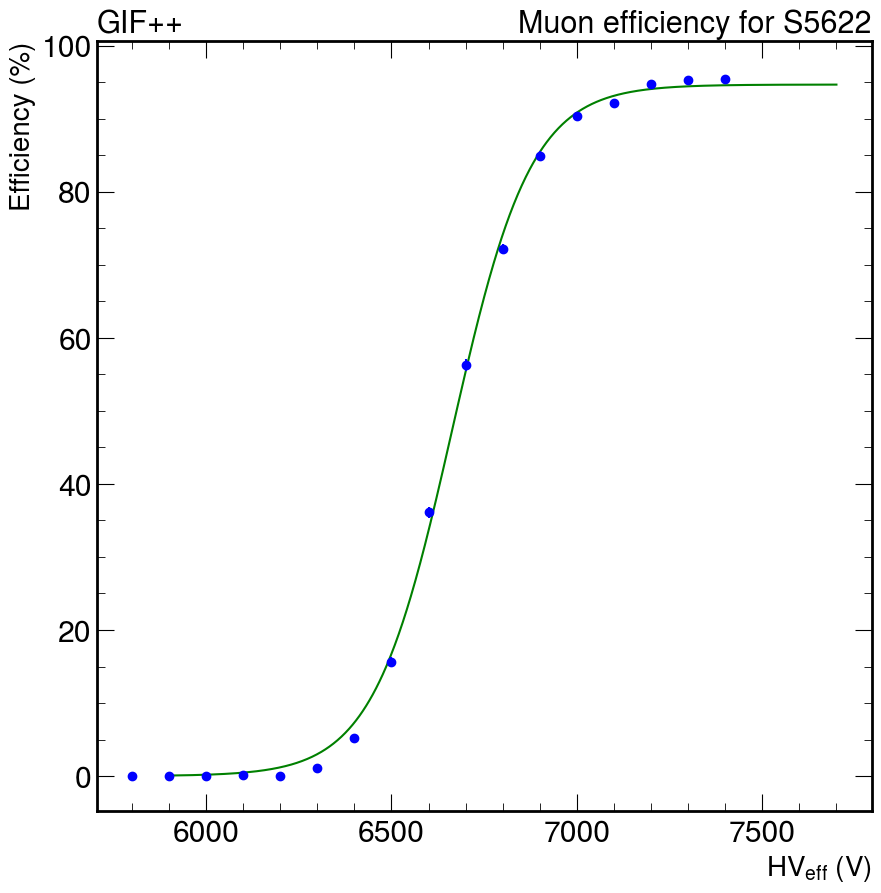

The working point (WP) is:  7120.478265368139  and the efficiency at the WP is:  94.53771982207071


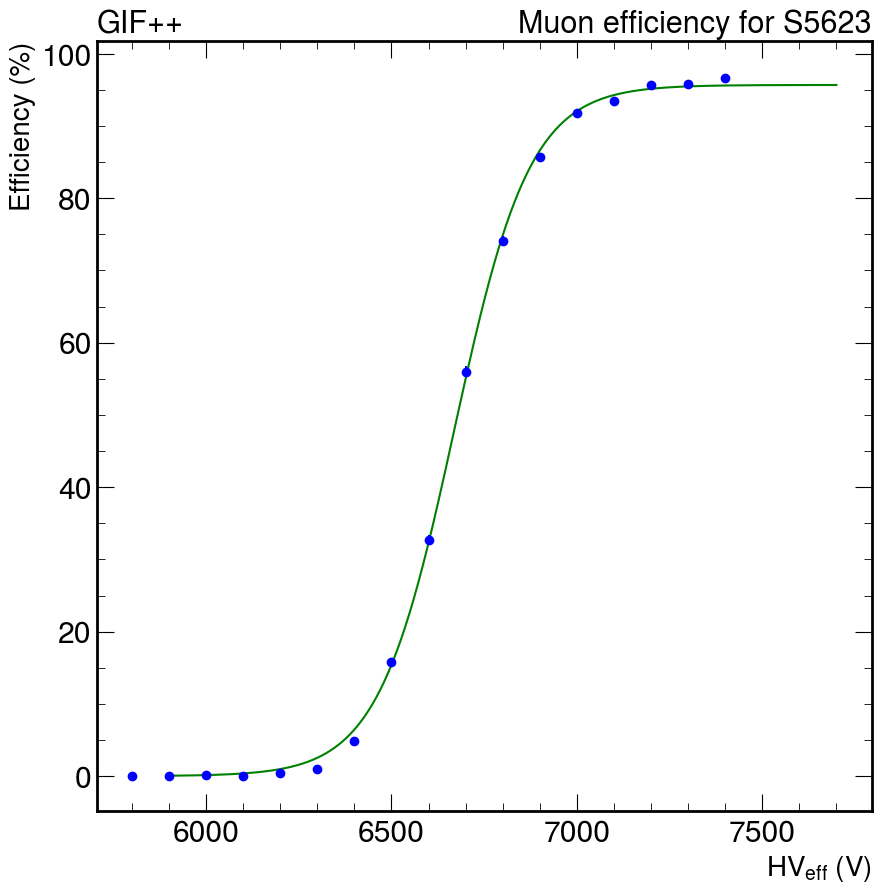

The working point (WP) is:  7131.270387127663  and the efficiency at the WP is:  96.0836196824055


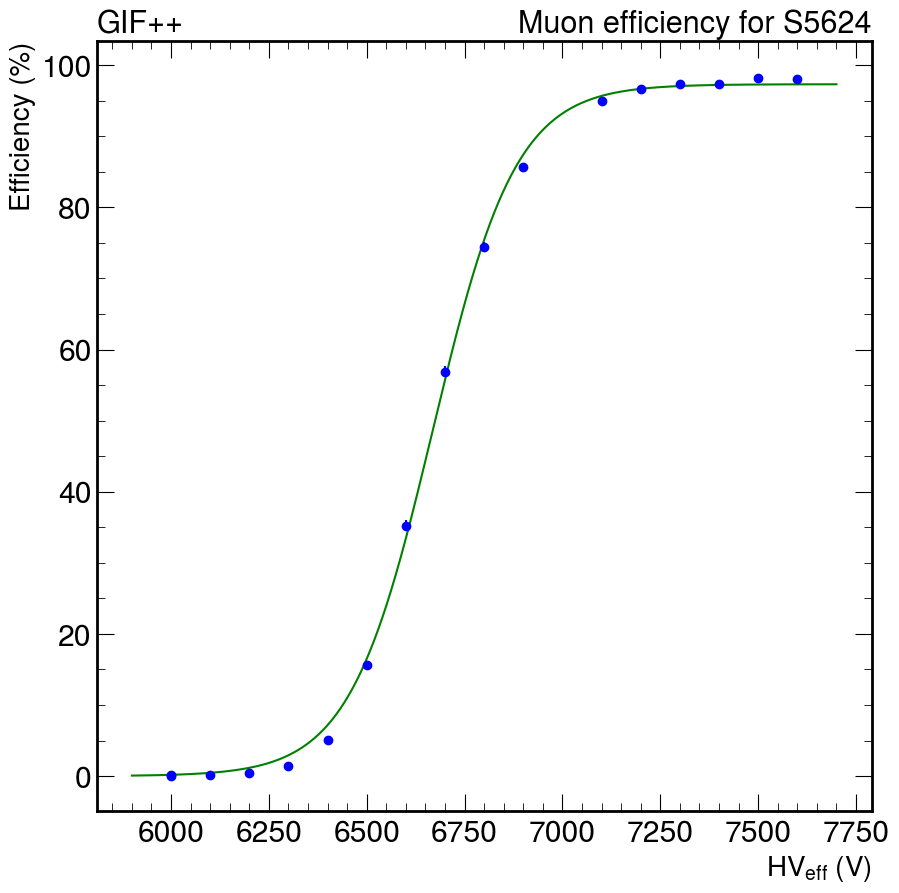

In [ ]:
p = []
WPs = []
EWPs = []

for i in range(4):

  if i == 0:
    flabel = 5627
  elif i == 1:
    flabel = 5622
  elif i == 2:
    flabel = 5623
  else:
    flabel = 5624

  pi, WPi, EWPi =  Scurve_fitting(v[i], e[i], err[i], flabel)
  p.append(pi)
  WPs.append(WPi)
  EWPs.append(EWPi)

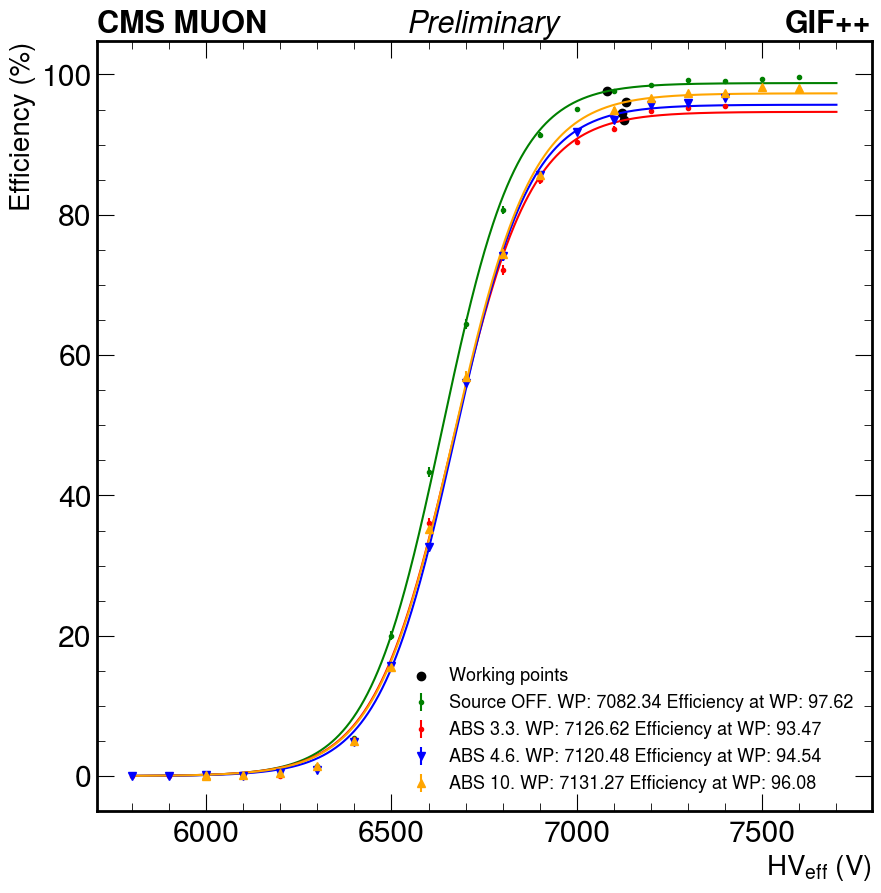

In [ ]:
def plot_all(voltages, efficiencies, e_err, param, WPs, EWps):

  x = np.linspace(5800, 7700, 1000)

  for k in range(len(voltages)):
    if k == 0:
      fcolor = 'green'
      filter = 'Source OFF.'
      fmt = '.'
    elif k == 1:
      fcolor = 'red'
      filter = 'ABS 3.3.'
      fmt = '.'
    elif k == 2:
      fcolor = 'blue'
      filter = 'ABS 4.6.'
      fmt = 'v'
    else:
      fcolor = 'orange'
      filter = 'ABS 10.'
      fmt = '^'

    s = Scurve(x, param[k][0], param[k][1], param[k][2])
    plt.plot(x, s, color = fcolor)
    plt.errorbar(x = voltages[k], y = efficiencies[k], yerr=e_err[k], xerr=None, fmt = fmt, color = fcolor, label=str(filter)+' WP: '
              +str(round(WPs[k], 2))+' Efficiency at WP: '+str(round(EWPs[k], 2)))
    plt.legend(loc='lower right', fontsize=13)

  plt.title('CMS MUON', loc = 'left', fontsize = 22, fontweight='bold')
  plt.title('Preliminary', loc='center', fontsize=22, fontstyle='italic')
  plt.title('GIF++', loc = 'right', fontsize = 22, fontweight='bold')
  plt.xlabel('$HV_{eff}$ (V)', fontsize = 20)
  plt.legend(loc = 'upper left')
  plt.scatter(WPs, EWPs, color = 'black', label='Working points')
  plt.legend(loc='lower right', fontsize =13)
  plt.ylabel('Efficiency (%)', fontsize = 20)
  plt.savefig('April_Mix1.pdf')
  plt.savefig('April_Mix1.png')
  plt.show()

plot_all(v, e, err, p, WPs, EWPs)

Gamma background rate

This next part is calculated as:

GBR = noise gamma rate/ Gamma Cluster

In [ ]:
def find_GB(flabel, WP):

  f = open(str(flabel)+'.json')
  data = json.load(f)

  vef = []
  for i in range(HV_points):
    name = 'HV' + str(i+1)
    vef.append(data[name]['hveff_KODELE-TOP'])

  for i in range(len(vef)):
    vef[i] = abs(vef[i] - WP)

  HV_number = vef.index(min(vef)) + 1

  print("The nearest HV point to the WP is: ", HV_number)

  name = 'HV' + str(HV_number)
  gamma_r = data[name]['noiseGammaRate']
  CLS = data[name]['gammaCLS']

  bkg = gamma_r/CLS
  print('Gamma background rate is: ', bkg)

  return bkg

In [ ]:
for l in range(len(WPs)):
  print("Scan: ", labels[l])
  find_GB(labels[l], WPs[l])

Scan:  5627
The nearest HV point to the WP is:  12
Gamma background rate is:  0.24025149526524367
Scan:  5622
The nearest HV point to the WP is:  14
Gamma background rate is:  1459.3975161543935
Scan:  5623
The nearest HV point to the WP is:  14
Gamma background rate is:  967.5737339021778
Scan:  5624
The nearest HV point to the WP is:  12
Gamma background rate is:  497.8234168326788


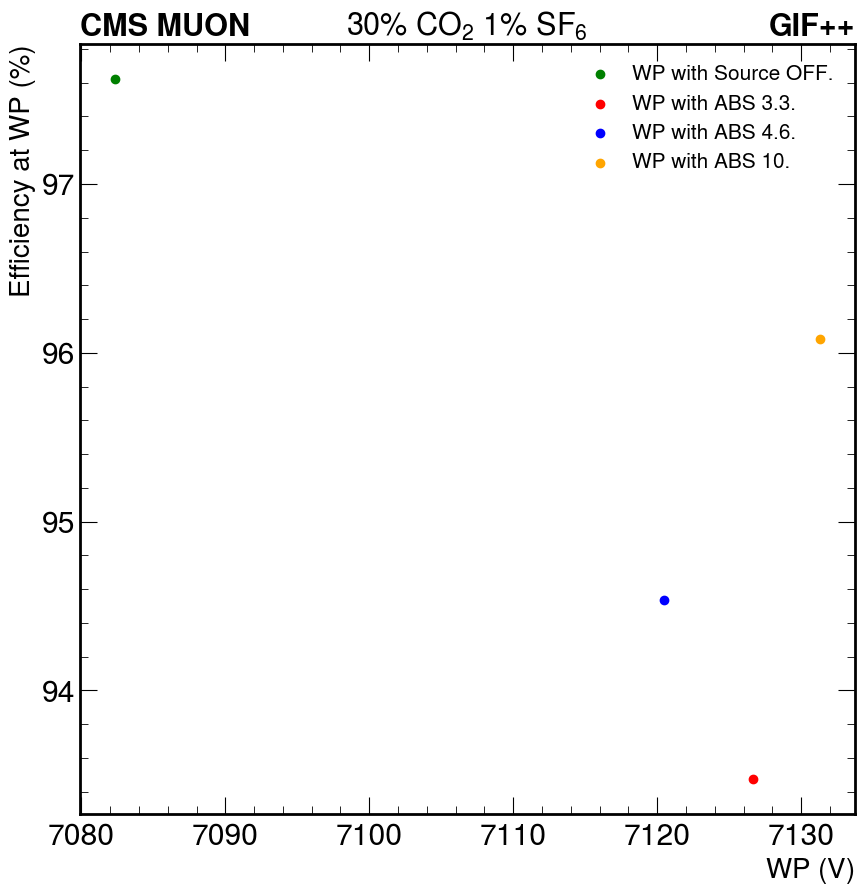

In [ ]:
for t in range(len(WPs)):

  if t == 0:
      fcolor = 'green'
      filter = 'Source OFF.'
      fmt = '.'
  elif t == 1:
    fcolor = 'red'
    filter = 'ABS 3.3.'
    fmt = '.'
  elif t == 2:
    fcolor = 'blue'
    filter = 'ABS 4.6.'
    fmt = 'v'
  else:
    fcolor = 'orange'
    filter = 'ABS 10.'
    fmt = '^'
  plt.scatter(WPs[t], EWPs[t], label='WP with '+str(filter), color=fcolor)
  plt.legend(loc='upper right', fontsize=15)

plt.title('CMS MUON', loc = 'left', fontsize = 22, fontweight='bold')
plt.title('30% $CO_2$ 1% $SF_6$', loc='center', fontsize=22)
plt.title('GIF++', loc = 'right', fontsize = 22, fontweight='bold')
plt.xlabel('$WP$ (V)', fontsize = 20)
plt.ylabel('Efficiency at WP (%)', fontsize = 20)
plt.savefig('April_Mix1_WP.pdf')
plt.savefig('April_Mix1_WP.png')
plt.show()

##Tests

In [ ]:
voltages = [[], [], []. []]
efficiency = [[], [], []. []]
efficiency_err = [[], []. [], []]

voltages = np.zeros((4, HV_points))
efficency = np.zeros((4, HV_points))
efficiency_err = np.zeros((4, HV_points))

for i in range(4):

  if i == 0:
    flabel = 5627
  elif i == 1:
    flabel = 5622
  elif i == 2:
    flabel = 5623
  else
    flabel = 5624

  f = open('output'+str(flabel)+'.json')
  data = json.load(f)

  for j in range(HV_points):
    name = 'HV' + str(j+1)
    voltages[i][j] = data[name]['hveff_KODELE-TOP']

  for k in range(HV_points):
    name = 'HV' + str(k+1)
    efficiency[i][k] = data[name]['efficiencyMuon_corrected']
    #efficiency.append(data[name]['efficiencyMuon_corrected'])

  for l in range(HV_points):
    name = 'HV' + str(l+1)
    efficiency_err[i][l] = data[name]['efficiencyMuon_corrected_err']
    efficiency_err.append(data[name]['efficiencyMuon_corrected_err'])


{'muon_CLS_WP_muon_corr': 1.4320916822302534,
 'muon_CMP_WP_muon_corr': 1.4942975384789392,
 'scanid': 5622,
 'imon_KODELE-TOP_WP_raw': 21.18696457040237,
 'hv50_err_raw': 1.3435463955264162,
 'gamma_WP_err_muon': 0.15820920306986835,
 'lam_muon': 0.010176688613310832,
 'gamma_CMP_WP_err_raw': 0.26203840830638075,
 'muon_CLS_WP_muon': 1.4656510366139854,
 'muon_CLS_WP_err_raw': 0.05555606485400235,
 'WP_muon_corr': 7072.9939311491,
 'eff_WP_muon_corr': 93.2702975559487,
 'HV9': {'efficiencyRaw': 98.92630551488531,
  'imon_err_KODELE-TOP': 0.04925141842032149,
  'efficiencyMuon': 37.23767691556857,
  'muonCMP_err': 0.057011795543905786,
  'gammaCLS': 1.1107189983735846,
  'gammaCMP_err': 0.16419832582099225,
  'efficiencyMuon_corrected_err': 0.7502405096856215,
  'efficiencyMuon_err': 0.7551875434877681,
  'imon_err_KODELE-BOT': 0.04279214132291786,
  'muonCMP': 1.1546526867627784,
  'gammaCLS_err': 0.041821709377069194,
  'imon_KODELE-TOP': 15.95862053180563,
  'gammaCMP': 4.1966516419

In [ ]:
f = open('5622.json')
data = json.load(f)
data

{'muon_CLS_WP_muon_corr': 1.4320916822302534,
 'muon_CMP_WP_muon_corr': 1.4942975384789392,
 'scanid': 5622,
 'imon_KODELE-TOP_WP_raw': 21.18696457040237,
 'hv50_err_raw': 1.3435463955264162,
 'gamma_WP_err_muon': 0.15820920306986835,
 'lam_muon': 0.010176688613310832,
 'gamma_CMP_WP_err_raw': 0.26203840830638075,
 'muon_CLS_WP_muon': 1.4656510366139854,
 'muon_CLS_WP_err_raw': 0.05555606485400235,
 'WP_muon_corr': 7072.9939311491,
 'eff_WP_muon_corr': 93.2702975559487,
 'HV9': {'efficiencyRaw': 98.92630551488531,
  'imon_err_KODELE-TOP': 0.04925141842032149,
  'efficiencyMuon': 37.23767691556857,
  'muonCMP_err': 0.057011795543905786,
  'gammaCLS': 1.1107189983735846,
  'gammaCMP_err': 0.16419832582099225,
  'efficiencyMuon_corrected_err': 0.7502405096856215,
  'efficiencyMuon_err': 0.7551875434877681,
  'imon_err_KODELE-BOT': 0.04279214132291786,
  'muonCMP': 1.1546526867627784,
  'gammaCLS_err': 0.041821709377069194,
  'imon_KODELE-TOP': 15.95862053180563,
  'gammaCMP': 4.1966516419

In [ ]:
v

[[6000.0,
  6100.0,
  6200.0,
  6300.0,
  6400.0,
  6500.0,
  6600.0,
  6700.0,
  6800.0,
  6900.0,
  7000.0,
  7100.0,
  7200.0,
  7300.0,
  7400.0,
  7500.0,
  7600.0],
 [5800.0,
  5900.0,
  6000.0,
  6100.0,
  6200.0,
  6300.0,
  6400.0,
  6500.0,
  6600.0,
  6700.0,
  6800.0,
  6900.0,
  7000.0,
  7100.0,
  7200.0,
  7300.0,
  7400.0],
 [5800.0,
  5900.0,
  6000.0,
  6100.0,
  6200.0,
  6300.0,
  6400.0,
  6500.0,
  6600.0,
  6700.0,
  6800.0,
  6900.0,
  7000.0,
  7100.0,
  7200.0,
  7300.0,
  7400.0],
 [6000.0,
  6000.0,
  6100.0,
  6200.0,
  6300.0,
  6400.0,
  6500.0,
  6600.0,
  6700.0,
  6800.0,
  6900.0,
  7100.0,
  7200.0,
  7300.0,
  7400.0,
  7500.0,
  7600.0]]

#Mixture: 40% CO$_2$, 1% SF$_6$

## Analysis plots

The list of files is:

5612 for source OFF

5611 for ABS 3.3 NOT THIS ONE XXXX

5613 for ABS 4.6

5616 for ABS 6.9

5614 for ABS 10

5615 for ABS 22

In [ ]:
labels = [5612, 5613, 5616, 5614]

v = []
e = []
e_err = []

for i in range(len(labels)):
  vi, ei, eei = read_file(labels[i])
  v.append(vi)
  e.append(ei)
  err.append(eei)

The working point (WP) is:  6998.973698085728  and the efficiency at the WP is:  97.47844829480718


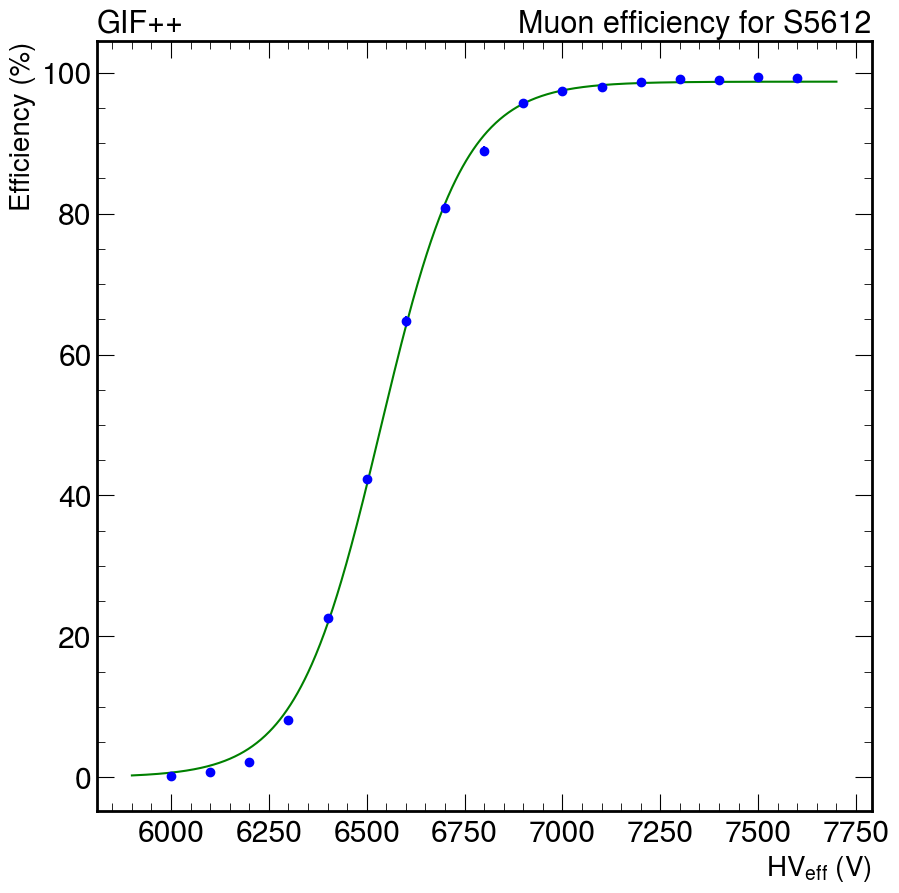

The working point (WP) is:  7007.3093798185155  and the efficiency at the WP is:  94.42728319041537


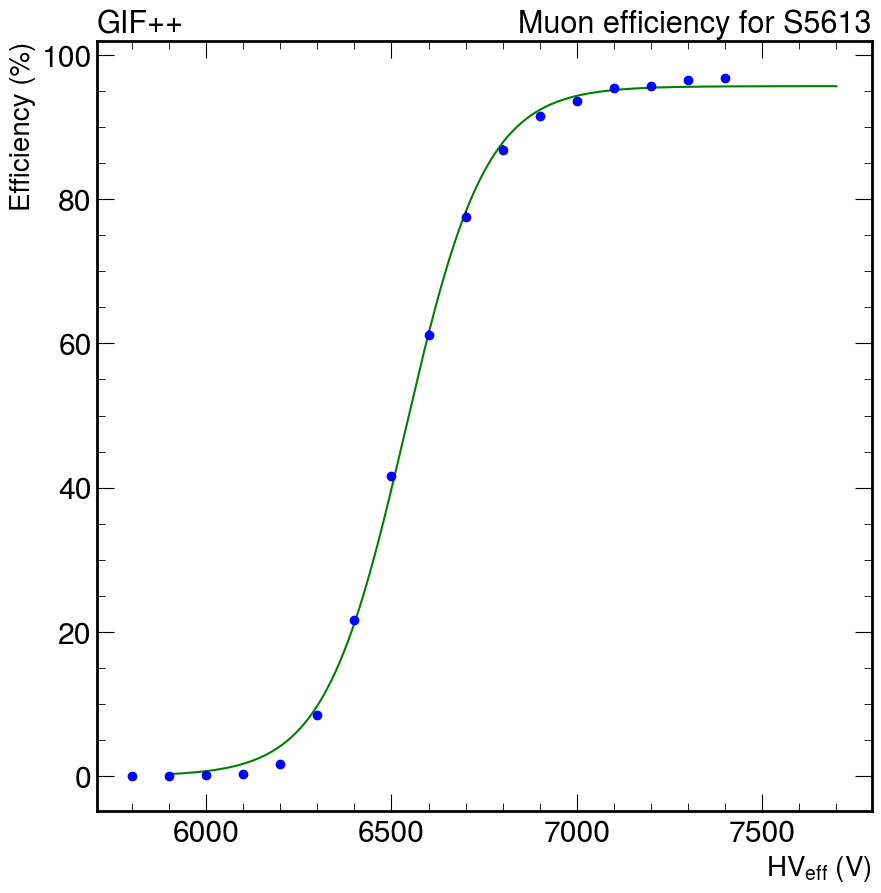

The working point (WP) is:  7002.506476117333  and the efficiency at the WP is:  95.12101281306238


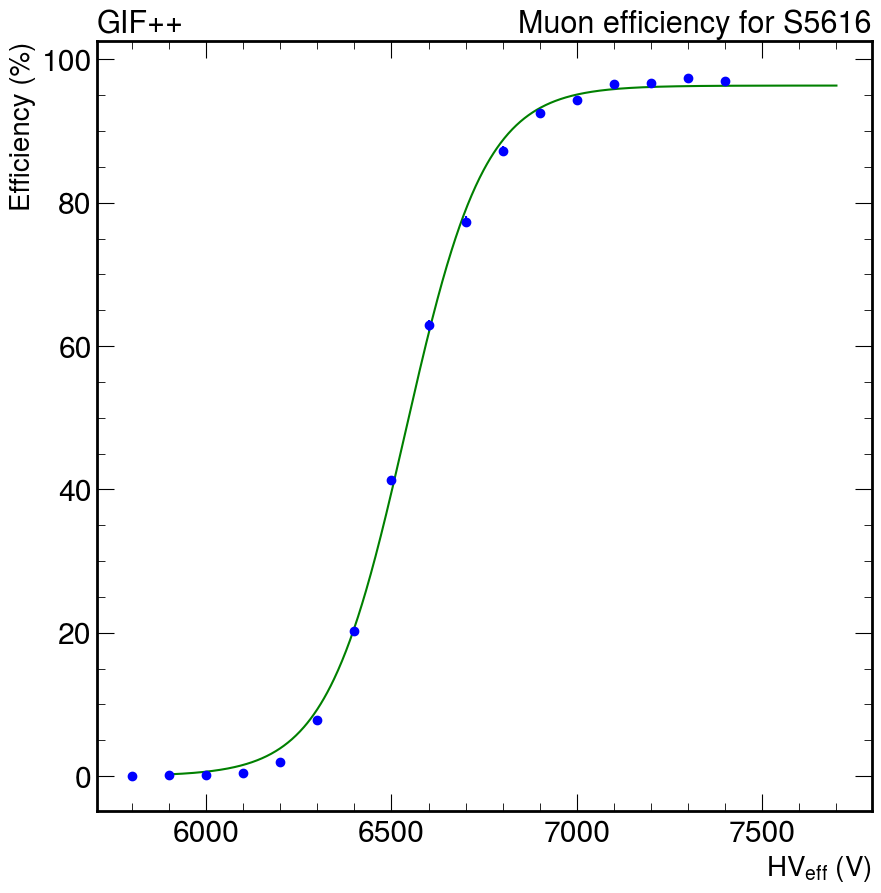

The working point (WP) is:  6999.880704613787  and the efficiency at the WP is:  95.53737083570982


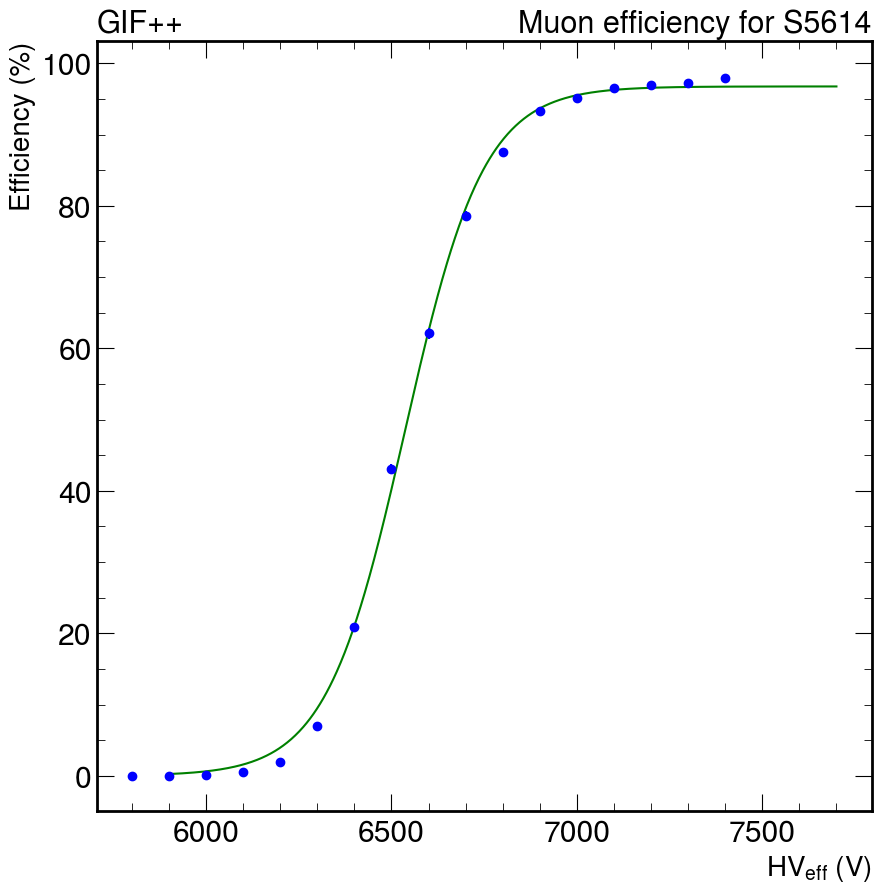

In [ ]:
p = []
WPs = []
EWPs = []

for i in range(len(labels)):

  flabel = labels[i]
  #if i == 0:
  #  flabel = labels[0]
  #elif i == 1:
  #  flabel = labels[1]
  #elif i == 2:
  #  flabel = labels[2]
  #else:
  #  flabel = labels[3]

  pi, WPi, EWPi =  Scurve_fitting(v[i], e[i], err[i], flabel)
  p.append(pi)
  WPs.append(WPi)
  EWPs.append(EWPi)

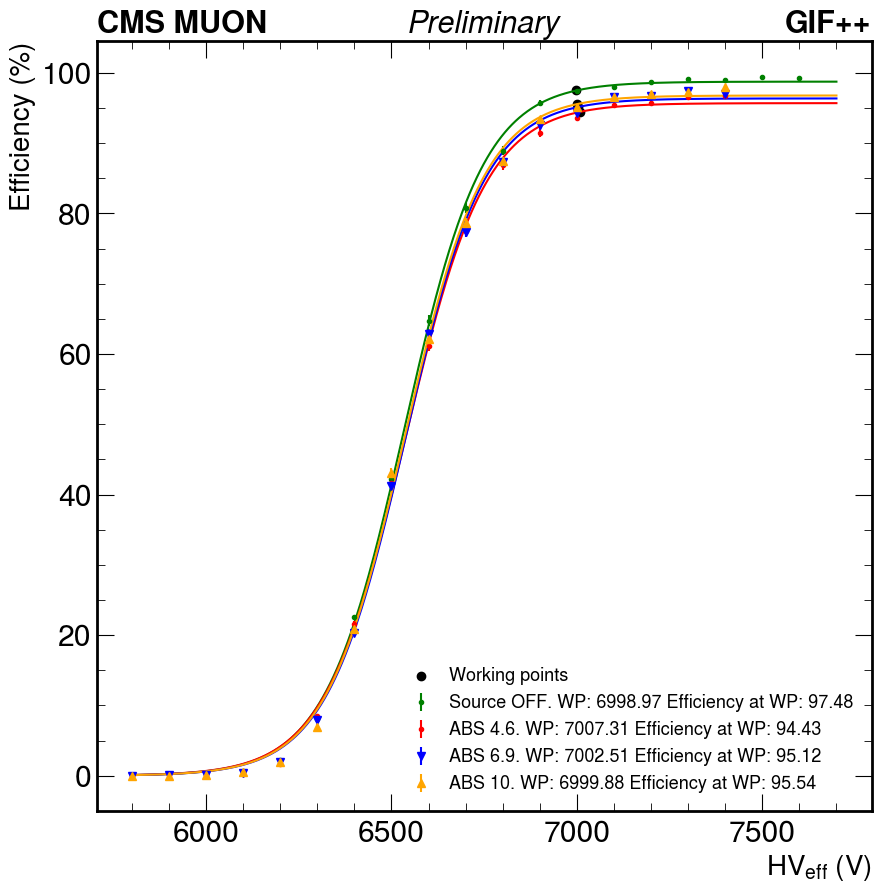

In [ ]:
def plot_all(voltages, efficiencies, e_err, param, WPs, EWps):

  x = np.linspace(5800, 7700, 1000)

  for k in range(len(voltages)):

    if k == 0:
      fcolor = 'green'
      filter = 'Source OFF.'
      fmt = '.'
    elif k == 1:
      fcolor = 'red'
      filter = 'ABS 4.6.'
      fmt = '.'
    elif k == 2:
      fcolor = 'blue'
      filter = 'ABS 6.9.'
      fmt = 'v'
    elif k == 3:
      fcolor = 'orange'
      filter = 'ABS 10.'
      fmt = '^'
    else:
      fcolor = 'purple'
      filter = 'ABS 22'
      fmt = 'o'

    s = Scurve(x, param[k][0], param[k][1], param[k][2])
    plt.plot(x, s, color = fcolor)
    plt.errorbar(x = voltages[k], y = efficiencies[k], yerr=e_err[k], xerr=None, fmt = fmt, color = fcolor, label=str(filter)+' WP: '
              +str(round(WPs[k], 2))+' Efficiency at WP: '+str(round(EWPs[k], 2)))
    plt.legend(loc='lower right', fontsize=13)

  plt.title('CMS MUON', loc = 'left', fontsize = 22, fontweight='bold')
  plt.title('GIF++', loc = 'right', fontsize = 22, fontweight='bold')
  plt.title('Preliminary', loc='center', fontsize=22, fontstyle='italic')
  plt.xlabel('$HV_{eff}$ (V)', fontsize = 20)
  plt.legend(loc = 'upper left')
  plt.scatter(WPs, EWPs, color = 'black', label='Working points')
  plt.legend(loc='lower right', fontsize =13)
  plt.ylabel('Efficiency (%)', fontsize = 20)
  plt.savefig('April_Mix2.pdf')
  plt.savefig('April_Mix2.png')
  plt.show()

plot_all(v, e, err, p, WPs, EWPs)

In [ ]:
for l in range(len(WPs)):
  find_GB(labels[l], WPs[l])

The nearest HV point to the WP is:  11
Gamma background rate is:  0.29792625168280734
The nearest HV point to the WP is:  13
Gamma background rate is:  993.3026163741803
The nearest HV point to the WP is:  13
Gamma background rate is:  759.4436303332154
The nearest HV point to the WP is:  13
Gamma background rate is:  516.7953719589316


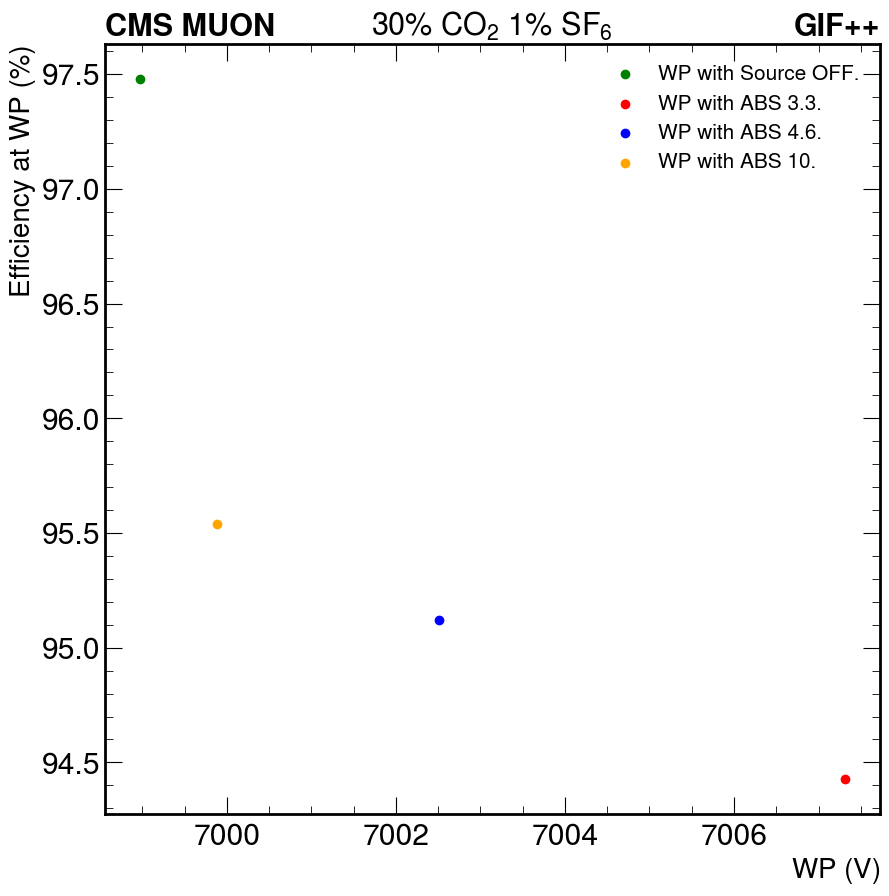

In [ ]:
for t in range(len(WPs)):

  if t == 0:
      fcolor = 'green'
      filter = 'Source OFF.'
      fmt = '.'
  elif t == 1:
    fcolor = 'red'
    filter = 'ABS 3.3.'
    fmt = '.'
  elif t == 2:
    fcolor = 'blue'
    filter = 'ABS 4.6.'
    fmt = 'v'
  else:
    fcolor = 'orange'
    filter = 'ABS 10.'
    fmt = '^'
  plt.scatter(WPs[t], EWPs[t], label='WP with '+str(filter), color=fcolor)
  plt.legend(loc='upper right', fontsize=15)

plt.title('CMS MUON', loc = 'left', fontsize = 22, fontweight='bold')
plt.title('30% $CO_2$ 1% $SF_6$', loc='center', fontsize=22)
plt.title('GIF++', loc = 'right', fontsize = 22, fontweight='bold')
plt.xlabel('$WP$ (V)', fontsize = 20)
plt.ylabel('Efficiency at WP (%)', fontsize = 20)
plt.savefig('April_Mix1_WP.pdf')
plt.savefig('April_Mix1_WP.png')
plt.show()

# Gas mixture: Standard

##Analysis plots

The list of files is:

5629 for ABS 3.3

5630 for ABS 4.6

5633 for ABS 6.9

5631 for ABS 10

5632 for ABS 22

In [ ]:
labels = [5629, 5630, 5633, 5631, 5632]

v = []
e = []
e_err = []

for i in range(len(labels)):
  vi, ei, eei = read_file(labels[i])
  v.append(vi)
  e.append(ei)
  err.append(eei)

The working point (WP) is:  7245.997894687995  and the efficiency at the WP is:  93.99753554902355


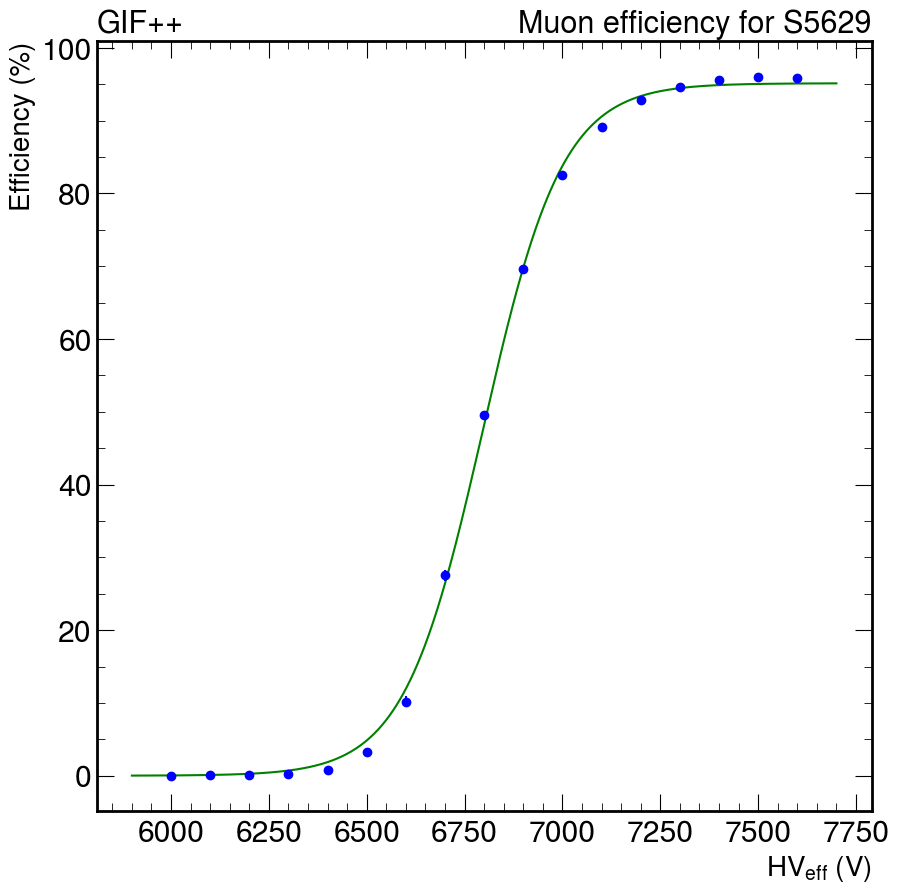

The working point (WP) is:  7260.141185810088  and the efficiency at the WP is:  95.22973739975463


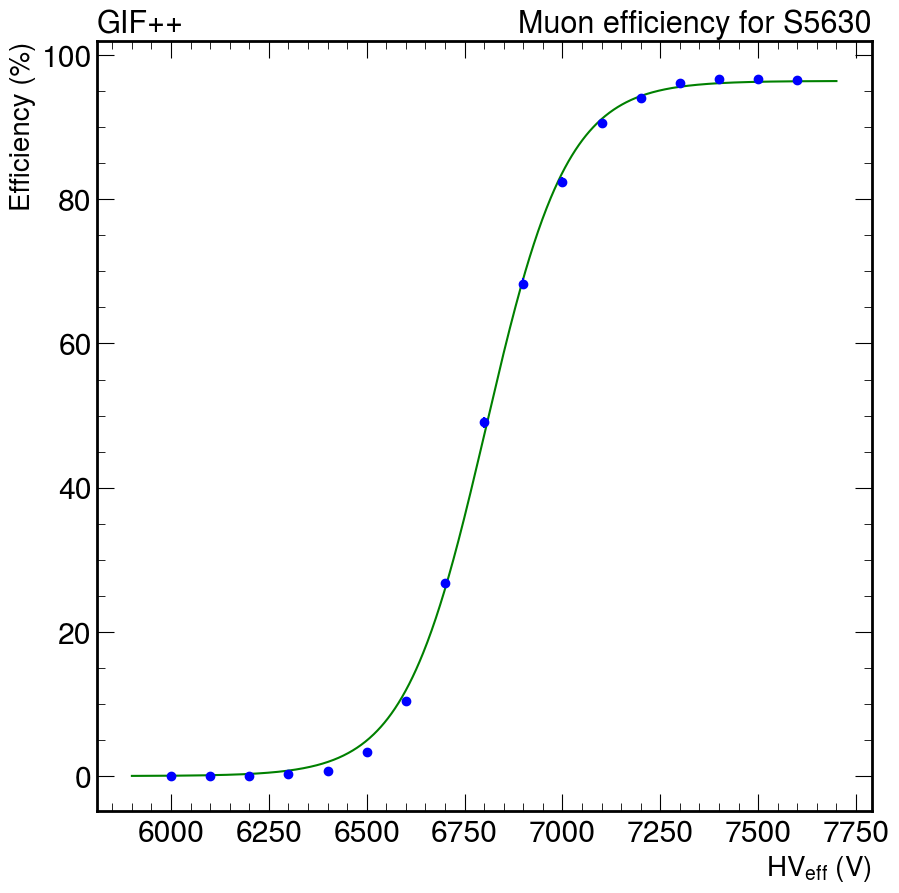

The working point (WP) is:  7243.201985789449  and the efficiency at the WP is:  95.71248813327466


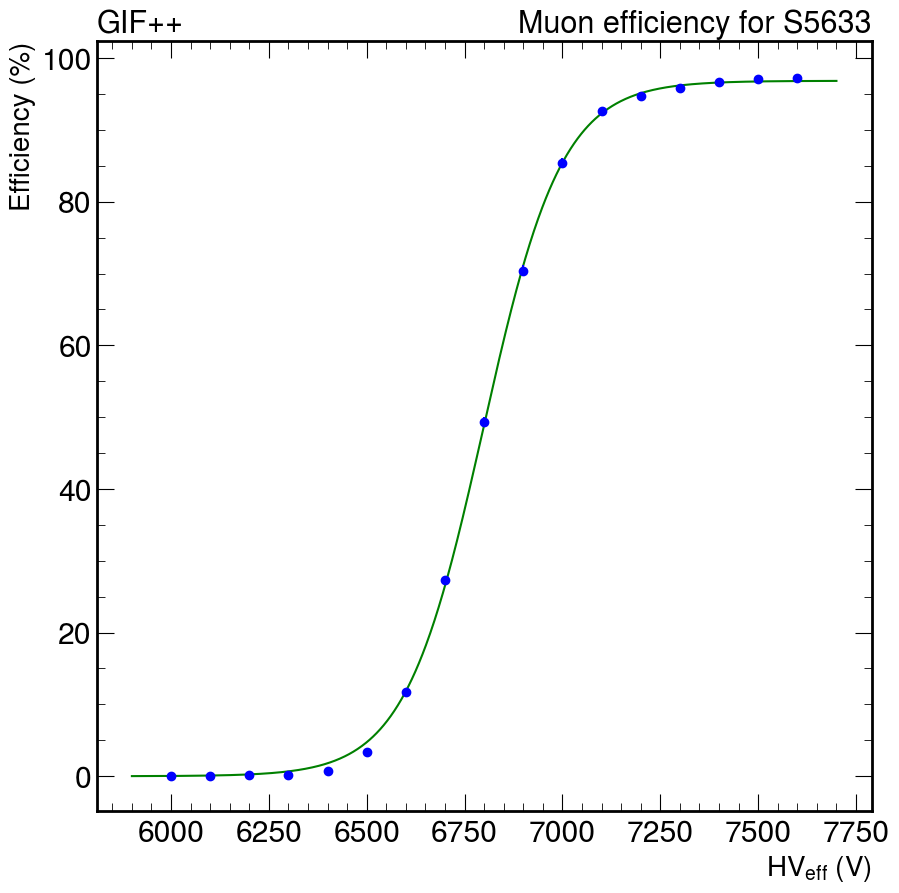

The working point (WP) is:  7261.313630926237  and the efficiency at the WP is:  96.37175845047065


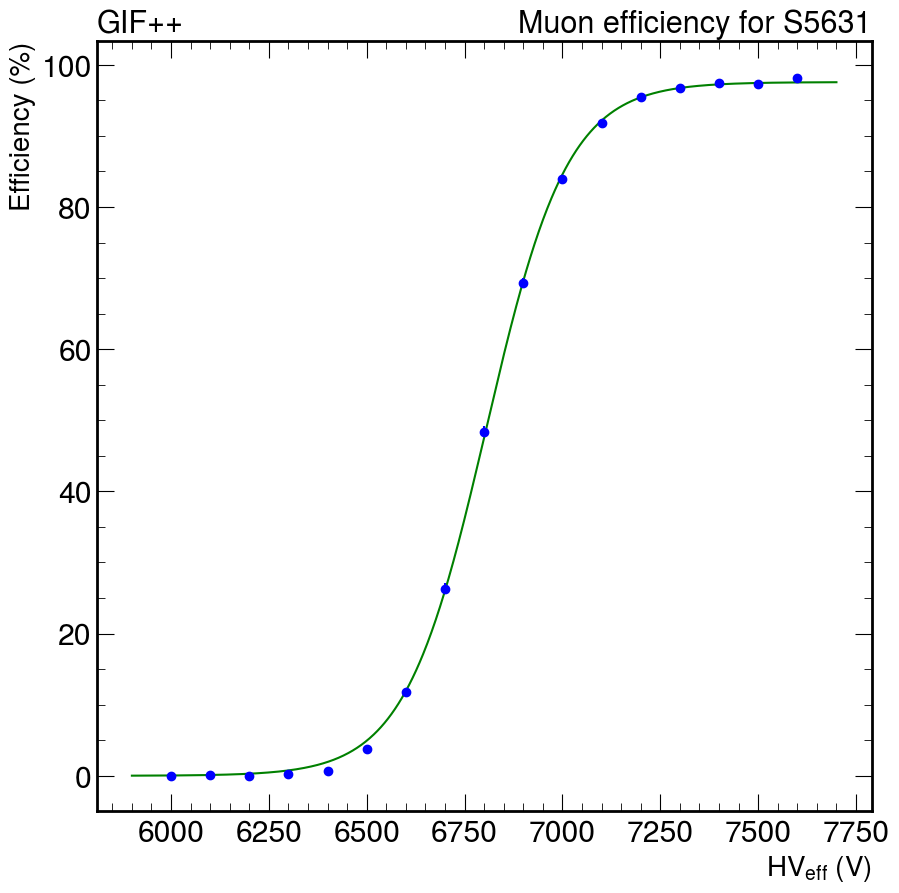

The working point (WP) is:  7253.926692254502  and the efficiency at the WP is:  97.14377299557171


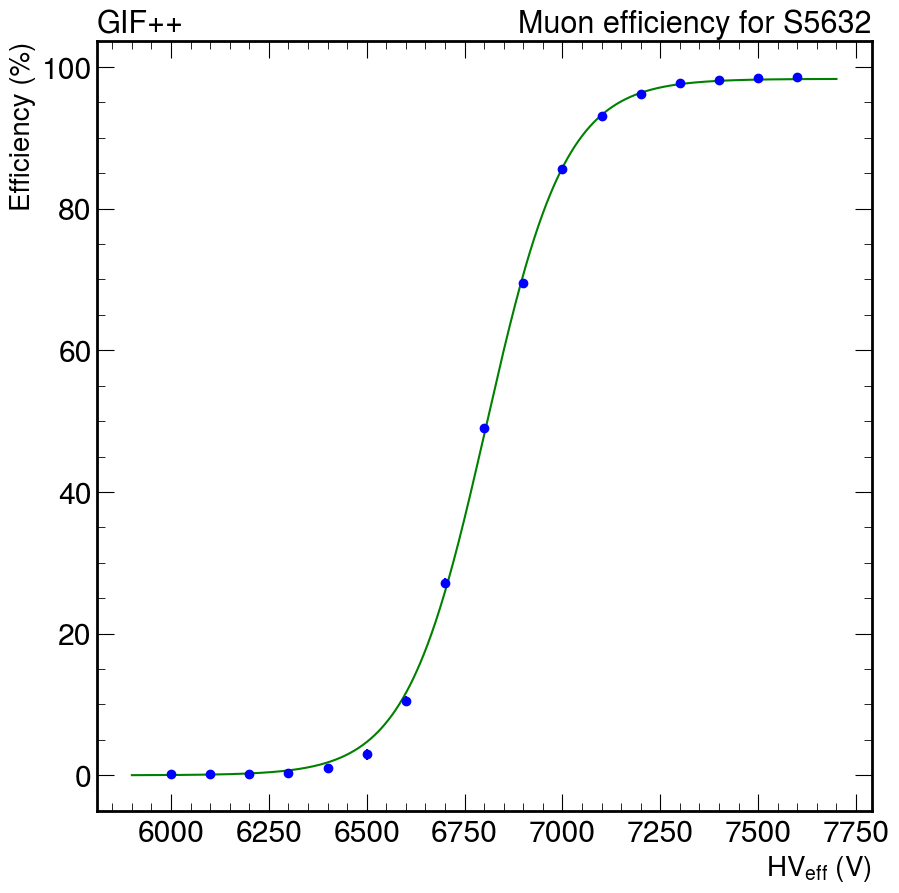

In [ ]:
p = []
WPs = []
EWPs = []

for i in range(len(labels)):

  flabel = labels[i]
  #if i == 0:
  #  flabel = labels[0]
  #elif i == 1:
  #  flabel = labels[1]
  #elif i == 2:
  #  flabel = labels[2]
  #else:
  #  flabel = labels[3]

  pi, WPi, EWPi =  Scurve_fitting(v[i], e[i], err[i], flabel)
  p.append(pi)
  WPs.append(WPi)
  EWPs.append(EWPi)

The working point (WP) is:  7253.926692254502  and the efficiency at the WP is:  97.14377299557171


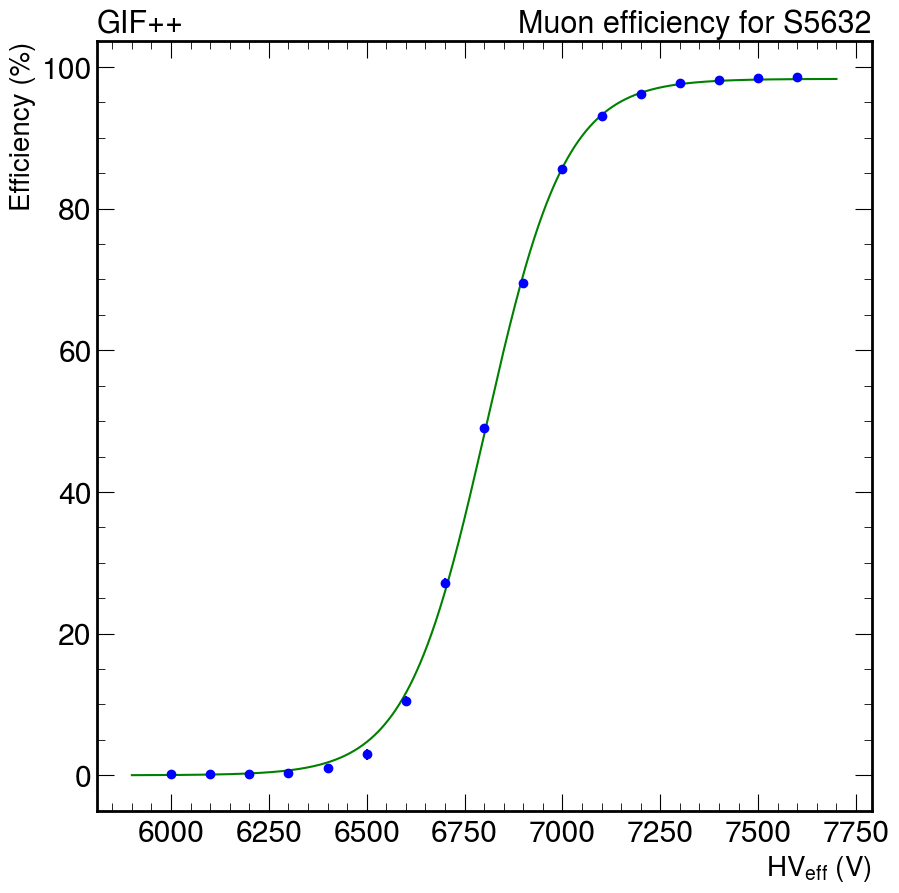

[array([9.83138646e+01, 6.80442543e+03, 9.83114048e-03]),
 7253.926692254502,
 97.14377299557171]

In [ ]:
Scurve_fitting(v[i], e[i], err[i], flabel)

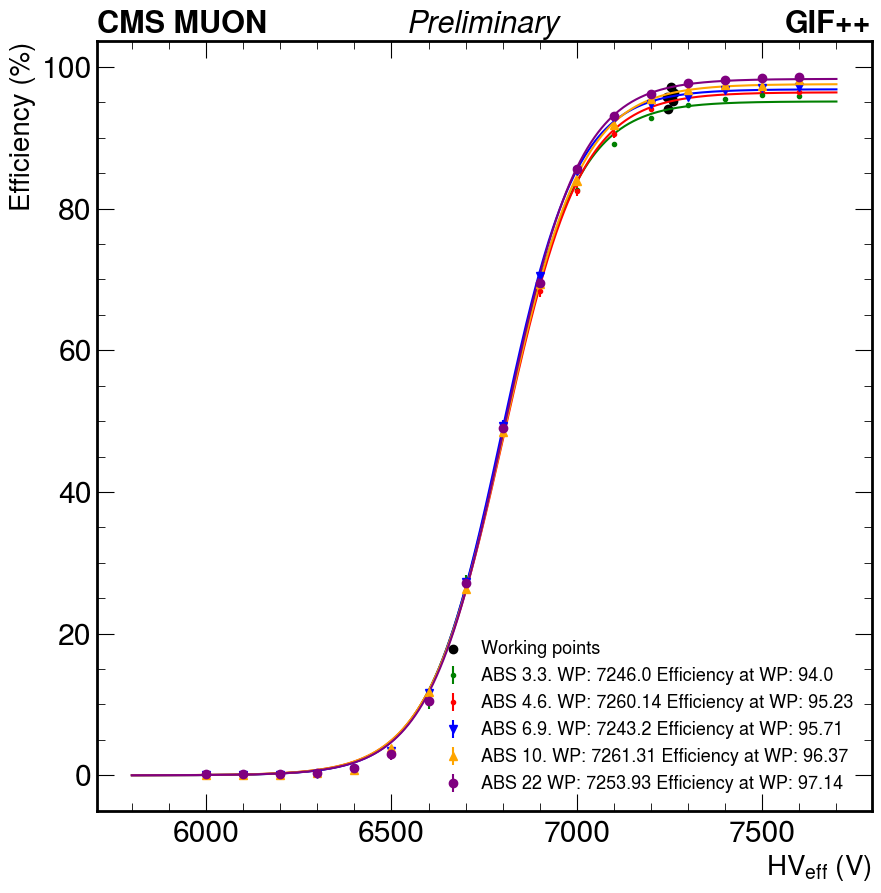

In [ ]:
def plot_all(voltages, efficiencies, e_err, param, WPs, EWps):

  x = np.linspace(5800, 7700, 1000)

  for k in range(len(voltages)):

    if k == 0:
      fcolor = 'green'
      filter = 'ABS 3.3.'
      fmt = '.'
    elif k == 1:
      fcolor = 'red'
      filter = 'ABS 4.6.'
      fmt = '.'
    elif k == 2:
      fcolor = 'blue'
      filter = 'ABS 6.9.'
      fmt = 'v'
    elif k == 3:
      fcolor = 'orange'
      filter = 'ABS 10.'
      fmt = '^'
    else:
      fcolor = 'purple'
      filter = 'ABS 22'
      fmt = 'o'

    s = Scurve(x, param[k][0], param[k][1], param[k][2])
    plt.plot(x, s, color = fcolor)
    plt.errorbar(x = voltages[k], y = efficiencies[k], yerr=e_err[k], xerr=None, fmt = fmt, color = fcolor, label=str(filter)+' WP: '
              +str(round(WPs[k], 2))+' Efficiency at WP: '+str(round(EWPs[k], 2)))
    plt.legend(loc='lower right', fontsize=13)

  plt.title('CMS MUON', loc = 'left', fontsize = 22, fontweight='bold')
  plt.title('GIF++', loc = 'right', fontsize = 22, fontweight='bold')
  plt.title('Preliminary', loc='center', fontsize=22, fontstyle='italic')
  plt.xlabel('$HV_{eff}$ (V)', fontsize = 20)
  plt.legend(loc = 'upper left')
  plt.scatter(WPs, EWPs, color = 'black', label='Working points')
  plt.legend(loc='lower right', fontsize =13)
  #plt.text('40% $CO_2$ 1% $SF_6$', loc = 'upper left')
  plt.ylabel('Efficiency (%)', fontsize = 20)
  plt.savefig('April_STD.pdf')
  plt.savefig('April_STD.png')
  plt.show()

plot_all(v, e, err, p, WPs, EWPs)

In [ ]:
for l in range(len(WPs)):
  find_GB(labels[l], WPs[l])

The nearest HV point to the WP is:  13
Gamma background rate is:  1264.1615183641004
The nearest HV point to the WP is:  14
Gamma background rate is:  938.3824935362005
The nearest HV point to the WP is:  13
Gamma background rate is:  637.144321628273
The nearest HV point to the WP is:  14
Gamma background rate is:  480.95988884667713
The nearest HV point to the WP is:  14
Gamma background rate is:  245.24563986901802


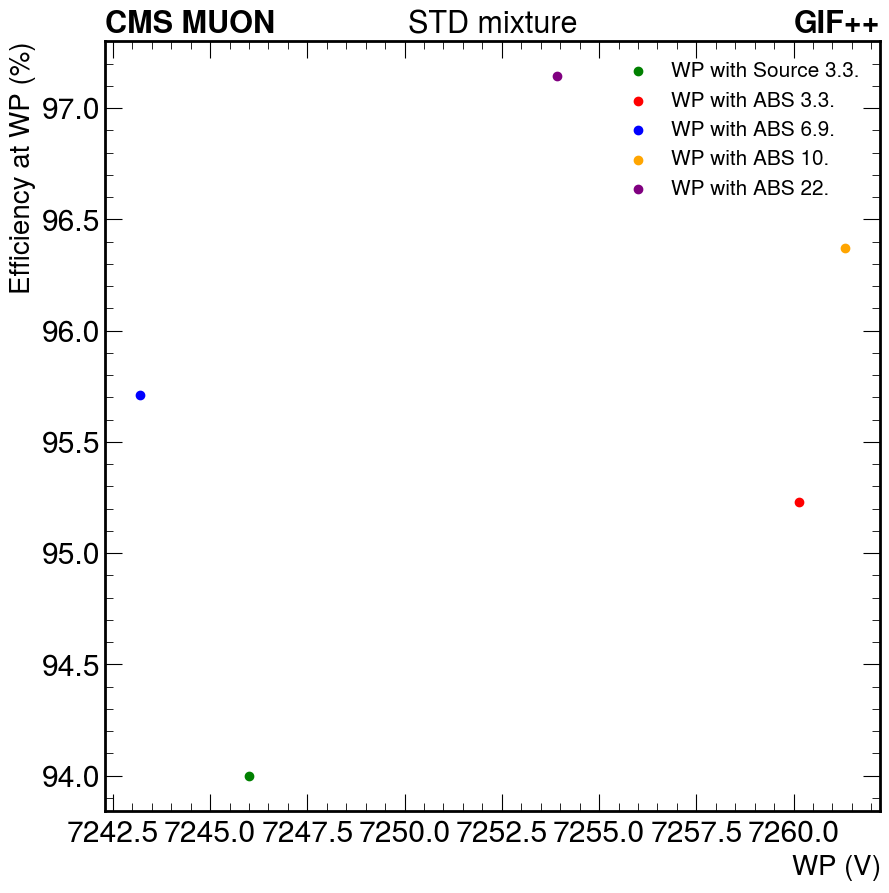

In [ ]:
for t in range(len(WPs)):

  if t == 0:
      fcolor = 'green'
      filter = 'Source 3.3.'
      fmt = '.'
  elif t == 1:
    fcolor = 'red'
    filter = 'ABS 3.3.'
    fmt = '.'
  elif t == 2:
    fcolor = 'blue'
    filter = 'ABS 6.9.'
    fmt = 'v'
  elif t == 3:
    fcolor = 'orange'
    filter = 'ABS 10.'
    fmt = '^'
  else:
    fcolor = 'purple'
    filter = 'ABS 22.'
    fmt = '^'
  plt.scatter(WPs[t], EWPs[t], label='WP with '+str(filter), color=fcolor)
  plt.legend(loc='upper right', fontsize=15)

plt.title('CMS MUON', loc = 'left', fontsize = 22, fontweight='bold')
plt.title('STD mixture', loc='center', fontsize=22)
plt.title('GIF++', loc = 'right', fontsize = 22, fontweight='bold')
plt.xlabel('$WP$ (V)', fontsize = 20)
plt.ylabel('Efficiency at WP (%)', fontsize = 20)
plt.savefig('April_STD_WP.pdf')
plt.savefig('April_STD_WP.png')
plt.show()